In [1]:
import pandas as pd 
import pickle
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge 

from sklearn.metrics import mean_squared_error

# Reading data

In [2]:
df_jan = pd.read_parquet("data/yellow_tripdata_2022-01.parquet")

df_feb = pd.read_parquet("data/yellow_tripdata_2022-02.parquet")

# Question 1: Number of columns in Jan 2022 Yellow Taxi Trip data

In [8]:
len(df_jan.columns)

19

In [9]:
# Creating duration(our target column) and converting in to minutes

df_jan['duration'] = df_jan.tpep_dropoff_datetime - df_jan.tpep_pickup_datetime

df_jan.duration = df_jan.duration.apply(lambda x: x.total_seconds() / 60)

# Question 2:  Standard deviation of the trips duration in Jan 2022 Yellow Taxi Trip data

In [10]:
print(round(df_jan.duration.std(),2))

46.45


# Question 3: Fraction of the records left after dropping the outliers

In [11]:
# Before removing outliers:
len(df_jan)

2463931

In [12]:
# Keeping only the records where the duration was between 1 and 60 minutes (inclusive).

df_jan = df_jan[(df_jan.duration >= 1) & (df_jan.duration <= 60)]

# after removing outliers:
len(df_jan)

2421440

In [13]:
# Fraction of records after dropping outliers:

print((2421440 / 2463931) * 100)

98.27547930522405


# Categorical & Numerical Variables:

In [14]:
categorical = ['PULocationID', 'DOLocationID']

numerical = ['trip_distance']

df_jan[categorical] = df_jan[categorical].astype(str)

# Encoding

In [15]:
train_dicts = df_jan[categorical].to_dict(orient='records')

In [16]:
dv = DictVectorizer()

X_train = dv.fit_transform(train_dicts)

y_train = df_jan['duration'].values

# Question 4: Dimensionality after OHE

In [23]:
# Dimension of the matrix

X_train.ndim

2

In [18]:
# Building Linear Regression for base model

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [19]:
# Evaluating on training data

y_pred = lr.predict(X_train)

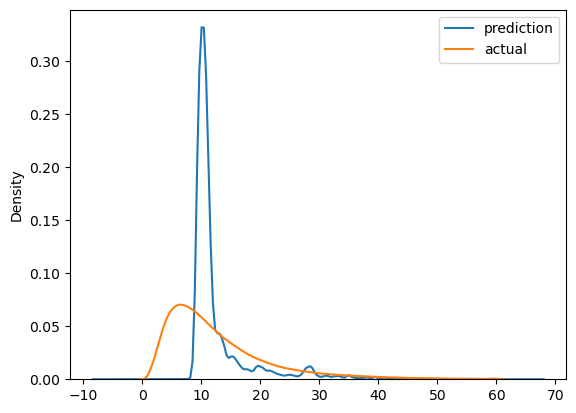

In [20]:
sns.kdeplot(y_pred, label='prediction')
sns.kdeplot(y_train, label='actual')

plt.legend()

# Question 6: RMSE on train

In [24]:
mean_squared_error(y_train, y_pred, squared=False)

6.986190769549357

# Evaluating on validation data (February)

In [34]:
# create a new column 'duration' in minutes
df_feb['duration'] = df_feb.tpep_dropoff_datetime - df_feb.tpep_pickup_datetime

# convert duration to seconds
df_feb.duration = df_feb.duration.apply(lambda x: x.total_seconds() / 60)

# convert categorical columns to strings
df_feb[categorical] = df_feb[categorical].astype(str)

# remove outliers by clipping duration between 1 and 60 mins
df_feb = df_feb[(df_feb.duration >= 1) & (df_feb.duration <= 60)]

# Instantiate a dictionary vectorizer
dv = DictVectorizer()

train_dicts = df_jan[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

# turn the categorical columns into a list of dictionaries
val_dicts = df_feb[categorical].to_dict(orient='records')

X_val = dv.transform(val_dicts)

# define target variable and assign to y_val

y_val = df_feb['duration'].values

# Get predictions for the VALIDATION set
y_pred = lr.predict(X_val)

# Question 6: RMSE on validation

In [35]:
mean_squared_error(y_val, y_pred, squared=False) 

7.786407870395467